# Пробуем разные приколы! 

На самой первой паре мы много говорили про Keras, высокоуровневое API для Tensorflow. Он позволяет быстро и без боли учить нейронки, в которых не встречается особо много извращений. В этой тетрадке мы окунёмся в него чуть глубже. Работать по-прежнему будем с одеждой. 

In [1]:
import numpy as np
import tensorflow as tf
tf.__version__ 

'2.0.0'

In [2]:
from tensorflow.keras import Sequential
keras, L = tf.keras, tf.keras.layers

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10**4, random_state=42)

X_train = X_train/ 255.
X_val = X_val/ 255.
X_test = X_test/ 255.

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
X_train.shape, X_val.shape, X_test.shape

((50000, 28, 28), (10000, 28, 28), (10000, 28, 28))

# 1. Инициализация и батчнорм

Разговор на прошлой паре мы закончили батч-нормализацией и рассказом про то, как правильно в нейросетках делается инициализация весов. Давайте закрепим эти знания на практике, и переработаем их в навыки. 

In [6]:
# Помните зачем эта функция? :3 
# Мы довольно активно использовали её, когда говорили про градиентные спуски

def plot_history(histories, key='loss', start=0):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch[start:], history.history['val_'+key][start:],
                       #'--', 
                       label=name.title()+' Val')
            #plt.plot(history.epoch[start:], history.history[key][start:], color=val[0].get_color(),
            #     label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([start, max(history.epoch)])
    pass

### Задание 1:

Для начала реализуйте простую нейросеть:
* принимает на вход картинки размера 28 x 28
* вытягивает их в вектор (`keras.layers.Flatten`)
* пропускает через $6$ полносвязных слоёв с сотней нейронов и вашей любимой функцией активации
* на выходе предсказывает веротятности принадлежности к каждому из 10 классов
* при обучении сетки поставьте размер батча $500$, учите сетку $20$ эпох

__Важно:__ поскольку в y_train лежат номера классов, керасу нужно либо указать sparse функции потерь и метрики (`sparse_categorical_crossentropy` и `sparse_categorical_accuracy`), либо конвертировать y в one-hot формат.

__Ещё важнее:__ при большом батче модель будет быстрее проходить эпохи. Когда он очень большой, необходимо довольно много эпох для сходимости. Градиент обновляется редко. Когда размер батча совсем маленький, сетка может обучаться довольно шумно. 

In [38]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  создайте сеть по инструкции выше
tf.random.set_seed(42)
model = Sequential() 

#model.add(L.InputLayer(shape=[28,28]))
model.add(L.Flatten(input_shape=(28, 28)))

model.add(L.Dense(100, kernel_initializer = 'uniform'))
model.add(L.ReLU())

model.add(L.Dense(100, kernel_initializer = 'uniform'))
model.add(L.ReLU())

model.add(L.Dense(100, kernel_initializer = 'uniform'))
model.add(L.ReLU())

model.add(L.Dense(100, kernel_initializer = 'uniform'))
model.add(L.ReLU())

model.add(L.Dense(100, kernel_initializer = 'uniform'))
model.add(L.ReLU())

model.add(L.Dense(100, kernel_initializer = 'uniform'))
model.add(L.ReLU())

model.add(L.Dense(10, kernel_initializer = 'uniform'))
model.add(L.Softmax())

opt = keras.optimizers.Adam(learning_rate=1e-4)
# model.summary()
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
               metrics=['sparse_categorical_accuracy'])

In [39]:
# model.variables
history1 = model.fit(X_train, y_train, #validation_split= 0.2,
            validation_data=(X_val, y_val),
            batch_size=500, epochs=20, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 27us/sample - loss: 2.2790 - sparse_categorical_accuracy: 0.2198 - val_loss: 2.0976 - val_sparse_categorical_accuracy: 0.2657
Epoch 2/20
50000/50000 [==============================] - 1s 12us/sample - loss: 1.4833 - sparse_categorical_accuracy: 0.3669 - val_loss: 1.1892 - val_sparse_categorical_accuracy: 0.4521
Epoch 3/20
50000/50000 [==============================] - 1s 12us/sample - loss: 1.1085 - sparse_categorical_accuracy: 0.4940 - val_loss: 1.0632 - val_sparse_categorical_accuracy: 0.5530
Epoch 4/20
50000/50000 [==============================] - 1s 12us/sample - loss: 1.0076 - sparse_categorical_accuracy: 0.5757 - val_loss: 0.9907 - val_sparse_categorical_accuracy: 0.5748
Epoch 5/20
50000/50000 [==============================] - 1s 12us/sample - loss: 0.9591 - sparse_categorical_accuracy: 0.5923 - val_loss: 0.9584 - val_sparse_categorical_accuracy: 0.5938
Epoch 6/20
5000

### Задание 2:

Возьмите ту же нейросетку и в качестве инициализации используйте либо инициализацию Хе либо Глорота (в зависимости от выбранных вами функций активации). 

In [44]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  создайте сеть по инструкции выше
tf.random.set_seed(42)
model = Sequential() 

#model.add(L.InputLayer(shape=[28,28]))
model.add(L.Flatten(input_shape=(28, 28)))

init = 'he_uniform'

model.add(L.Dense(100, kernel_initializer = init))
model.add(L.ReLU())

model.add(L.Dense(100, kernel_initializer = init))
model.add(L.ReLU())

model.add(L.Dense(100, kernel_initializer = init))
model.add(L.ReLU())

model.add(L.Dense(100, kernel_initializer = init))
model.add(L.ReLU())

model.add(L.Dense(100, kernel_initializer = init))
model.add(L.ReLU())

model.add(L.Dense(100, kernel_initializer = init))
model.add(L.ReLU())

model.add(L.Dense(10, kernel_initializer = init))
model.add(L.Softmax())

opt = keras.optimizers.Adam(learning_rate=1e-4)
# model.summary()
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
               metrics=['sparse_categorical_accuracy'])

# model.variables
history2 = model.fit(X_train, y_train, #validation_split= 0.2,
            validation_data=(X_val, y_val),
            batch_size=500, epochs=20, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 28us/sample - loss: 1.4363 - sparse_categorical_accuracy: 0.5475 - val_loss: 0.7614 - val_sparse_categorical_accuracy: 0.7348
Epoch 2/20
50000/50000 [==============================] - 1s 12us/sample - loss: 0.6244 - sparse_categorical_accuracy: 0.7843 - val_loss: 0.5559 - val_sparse_categorical_accuracy: 0.8122
Epoch 3/20
50000/50000 [==============================] - 1s 12us/sample - loss: 0.5113 - sparse_categorical_accuracy: 0.8231 - val_loss: 0.4936 - val_sparse_categorical_accuracy: 0.8292
Epoch 4/20
50000/50000 [==============================] - 1s 12us/sample - loss: 0.4663 - sparse_categorical_accuracy: 0.8380 - val_loss: 0.4622 - val_sparse_categorical_accuracy: 0.8399
Epoch 5/20
50000/50000 [==============================] - 1s 12us/sample - loss: 0.4376 - sparse_categorical_accuracy: 0.8476 - val_loss: 0.4395 - val_sparse_categorical_accuracy: 0.8456
Epoch 6/20
5000

### Задание 3:

Берём ту же самую сетку и добавляем в неё батч-нормализацию после каждго слоя. Инициализацию замените назад на равномерную. 

In [47]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  создайте сеть по инструкции выше
tf.random.set_seed(42)
model = Sequential() 

#model.add(L.InputLayer(shape=[28,28]))
model.add(L.Flatten(input_shape=(28, 28)))

init = 'uniform'

model.add(L.Dense(100, kernel_initializer = init))
model.add(L.BatchNormalization())
model.add(L.ReLU())

model.add(L.Dense(100, kernel_initializer = init))
model.add(L.BatchNormalization())
model.add(L.ReLU())

model.add(L.Dense(100, kernel_initializer = init))
model.add(L.BatchNormalization())
model.add(L.ReLU())

model.add(L.Dense(100, kernel_initializer = init))
model.add(L.BatchNormalization())
model.add(L.ReLU())

model.add(L.Dense(100, kernel_initializer = init))
model.add(L.BatchNormalization())
model.add(L.ReLU())

model.add(L.Dense(100, kernel_initializer = init))
model.add(L.BatchNormalization())
model.add(L.ReLU())

model.add(L.Dense(10, kernel_initializer = init))
model.add(L.Softmax())

opt = keras.optimizers.Adam(learning_rate=1e-4)
# model.summary()
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
               metrics=['sparse_categorical_accuracy'])

# model.variables
history3 = model.fit(X_train, y_train, #validation_split= 0.2,
            validation_data=(X_val, y_val),
            batch_size=500, epochs=20, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 58us/sample - loss: 1.6123 - sparse_categorical_accuracy: 0.6436 - val_loss: 2.3020 - val_sparse_categorical_accuracy: 0.0997
Epoch 2/20
50000/50000 [==============================] - 1s 23us/sample - loss: 0.9674 - sparse_categorical_accuracy: 0.8097 - val_loss: 2.2624 - val_sparse_categorical_accuracy: 0.1533
Epoch 3/20
50000/50000 [==============================] - 1s 23us/sample - loss: 0.6992 - sparse_categorical_accuracy: 0.8533 - val_loss: 1.8237 - val_sparse_categorical_accuracy: 0.6664
Epoch 4/20
50000/50000 [==============================] - 1s 23us/sample - loss: 0.5539 - sparse_categorical_accuracy: 0.8709 - val_loss: 0.9557 - val_sparse_categorical_accuracy: 0.8595
Epoch 5/20
50000/50000 [==============================] - 1s 23us/sample - loss: 0.4659 - sparse_categorical_accuracy: 0.8813 - val_loss: 0.5919 - val_sparse_categorical_accuracy: 0.8673
Epoch 6/20
5000

### Задание 4:

А теперь сразу и инициализация и батч-нормализация.

In [48]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  создайте сеть по инструкции выше
tf.random.set_seed(42)
model = Sequential() 

#model.add(L.InputLayer(shape=[28,28]))
model.add(L.Flatten(input_shape=(28, 28)))

init = 'he_uniform'

model.add(L.Dense(100, kernel_initializer = init))
model.add(L.BatchNormalization())
model.add(L.ReLU())

model.add(L.Dense(100, kernel_initializer = init))
model.add(L.BatchNormalization())
model.add(L.ReLU())

model.add(L.Dense(100, kernel_initializer = init))
model.add(L.BatchNormalization())
model.add(L.ReLU())

model.add(L.Dense(100, kernel_initializer = init))
model.add(L.BatchNormalization())
model.add(L.ReLU())

model.add(L.Dense(100, kernel_initializer = init))
model.add(L.BatchNormalization())
model.add(L.ReLU())

model.add(L.Dense(100, kernel_initializer = init))
model.add(L.BatchNormalization())
model.add(L.ReLU())

model.add(L.Dense(10, kernel_initializer = init))
model.add(L.Softmax())

opt = keras.optimizers.Adam(learning_rate=1e-4)
# model.summary()
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
               metrics=['sparse_categorical_accuracy'])

# model.variables
history4 = model.fit(X_train, y_train, #validation_split= 0.2,
            validation_data=(X_val, y_val),
            batch_size=500, epochs=20, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 53us/sample - loss: 1.6176 - sparse_categorical_accuracy: 0.4924 - val_loss: 1.6253 - val_sparse_categorical_accuracy: 0.5952
Epoch 2/20
50000/50000 [==============================] - 1s 24us/sample - loss: 0.8757 - sparse_categorical_accuracy: 0.7407 - val_loss: 0.9539 - val_sparse_categorical_accuracy: 0.7324
Epoch 3/20
50000/50000 [==============================] - 1s 24us/sample - loss: 0.6628 - sparse_categorical_accuracy: 0.7923 - val_loss: 0.6768 - val_sparse_categorical_accuracy: 0.7865
Epoch 4/20
50000/50000 [==============================] - 1s 24us/sample - loss: 0.5582 - sparse_categorical_accuracy: 0.8178 - val_loss: 0.5630 - val_sparse_categorical_accuracy: 0.8136
Epoch 5/20
50000/50000 [==============================] - 1s 24us/sample - loss: 0.4960 - sparse_categorical_accuracy: 0.8336 - val_loss: 0.5029 - val_sparse_categorical_accuracy: 0.8268
Epoch 6/20
5000

### Задание 5:

Дело осталось за малым. Нарисовать траектории обучения всех сеток на одной картинке и сравнить их между собой.

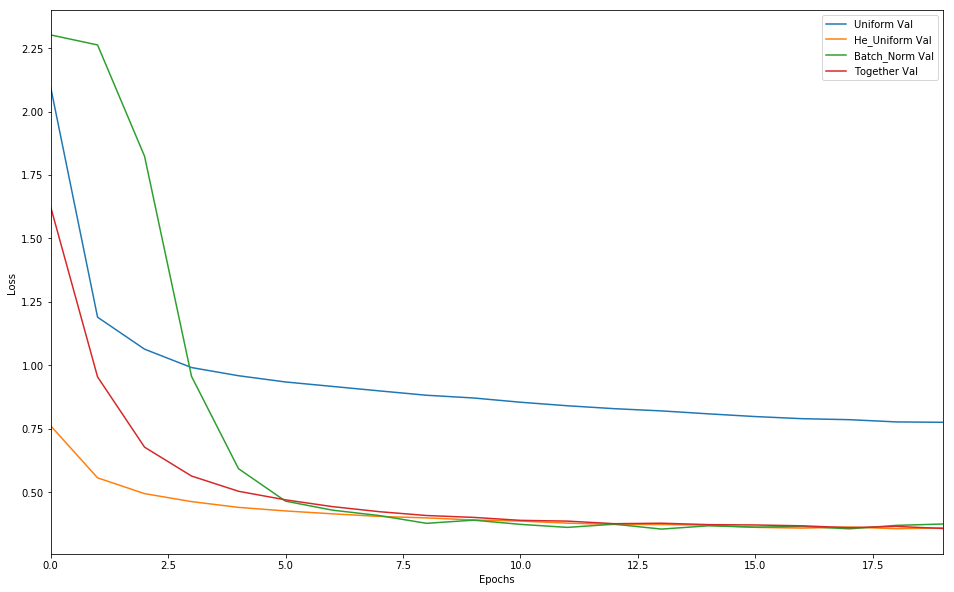

In [49]:
plot_history([('uniform',    history1), 
              ('he_uniform', history2),
              ('batch_norm', history3),
              ('together',   history4)
             ],
             start=0)

## 2. Функции активации  

### Задание 6:

Давайте попробуем поймать эффект, когда у нашей нейронки наступает паралич. Возьмите самый первый вариант нейросетки и замените все функции активации на сигмоиды. 



In [50]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  создайте сеть по инструкции выше
tf.random.set_seed(42)
model = Sequential() 

act = 'sigmoid'

#model.add(L.InputLayer(shape=[28,28]))
model.add(L.Flatten(input_shape=(28, 28)))

model.add(L.Dense(100, kernel_initializer = 'uniform',
                        activation=act))
model.add(L.Dense(100, kernel_initializer = 'uniform',
                        activation=act))
model.add(L.Dense(100, kernel_initializer = 'uniform',
                        activation=act))
model.add(L.Dense(100, kernel_initializer = 'uniform',
                        activation=act))
model.add(L.Dense(100, kernel_initializer = 'uniform',
                        activation=act))
model.add(L.Dense(100, kernel_initializer = 'uniform',
                        activation=act))

model.add(L.Dense(10, kernel_initializer = 'uniform',
                        activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=1e-4)

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
               metrics=['sparse_categorical_accuracy'])

history5 = model.fit(X_train, y_train, #validation_split= 0.2,
            validation_data=(X_val, y_val),
            batch_size=500, epochs=20, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 32us/sample - loss: 2.3037 - sparse_categorical_accuracy: 0.0985 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1008
Epoch 2/20
50000/50000 [==============================] - 1s 13us/sample - loss: 2.3029 - sparse_categorical_accuracy: 0.0996 - val_loss: 2.3028 - val_sparse_categorical_accuracy: 0.1002
Epoch 3/20
50000/50000 [==============================] - 1s 13us/sample - loss: 2.3029 - sparse_categorical_accuracy: 0.0968 - val_loss: 2.3028 - val_sparse_categorical_accuracy: 0.0947
Epoch 4/20
50000/50000 [==============================] - 1s 12us/sample - loss: 2.3028 - sparse_categorical_accuracy: 0.0999 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.1001
Epoch 5/20
50000/50000 [==============================] - 1s 12us/sample - loss: 2.3029 - sparse_categorical_accuracy: 0.0971 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.0997
Epoch 6/20
5000

### Задание 7:  

Теперь попробуем взять вместо сигмоид elu

In [51]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  создайте сеть по инструкции выше
tf.random.set_seed(42)
model = Sequential() 

act = 'elu'

#model.add(L.InputLayer(shape=[28,28]))
model.add(L.Flatten(input_shape=(28, 28)))

model.add(L.Dense(100, kernel_initializer = 'uniform',
                        activation=act))
model.add(L.Dense(100, kernel_initializer = 'uniform',
                        activation=act))
model.add(L.Dense(100, kernel_initializer = 'uniform',
                        activation=act))
model.add(L.Dense(100, kernel_initializer = 'uniform',
                        activation=act))
model.add(L.Dense(100, kernel_initializer = 'uniform',
                        activation=act))
model.add(L.Dense(100, kernel_initializer = 'uniform',
                        activation=act))

model.add(L.Dense(10, kernel_initializer = 'uniform',
                        activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=1e-4)

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
               metrics=['sparse_categorical_accuracy'])

history6 = model.fit(X_train, y_train, #validation_split= 0.2,
            validation_data=(X_val, y_val),
            batch_size=500, epochs=20, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 24us/sample - loss: 2.1243 - sparse_categorical_accuracy: 0.2255 - val_loss: 1.7067 - val_sparse_categorical_accuracy: 0.1962
Epoch 2/20
50000/50000 [==============================] - 1s 13us/sample - loss: 1.6374 - sparse_categorical_accuracy: 0.2337 - val_loss: 1.5277 - val_sparse_categorical_accuracy: 0.3736
Epoch 3/20
50000/50000 [==============================] - 1s 13us/sample - loss: 1.2166 - sparse_categorical_accuracy: 0.4786 - val_loss: 1.0278 - val_sparse_categorical_accuracy: 0.5876
Epoch 4/20
50000/50000 [==============================] - 1s 13us/sample - loss: 0.9650 - sparse_categorical_accuracy: 0.6103 - val_loss: 0.9246 - val_sparse_categorical_accuracy: 0.6359
Epoch 5/20
50000/50000 [==============================] - 1s 13us/sample - loss: 0.8928 - sparse_categorical_accuracy: 0.6488 - val_loss: 0.8776 - val_sparse_categorical_accuracy: 0.6557
Epoch 6/20
5000

### Задание 8:

Снова сравниваем модели между собой.

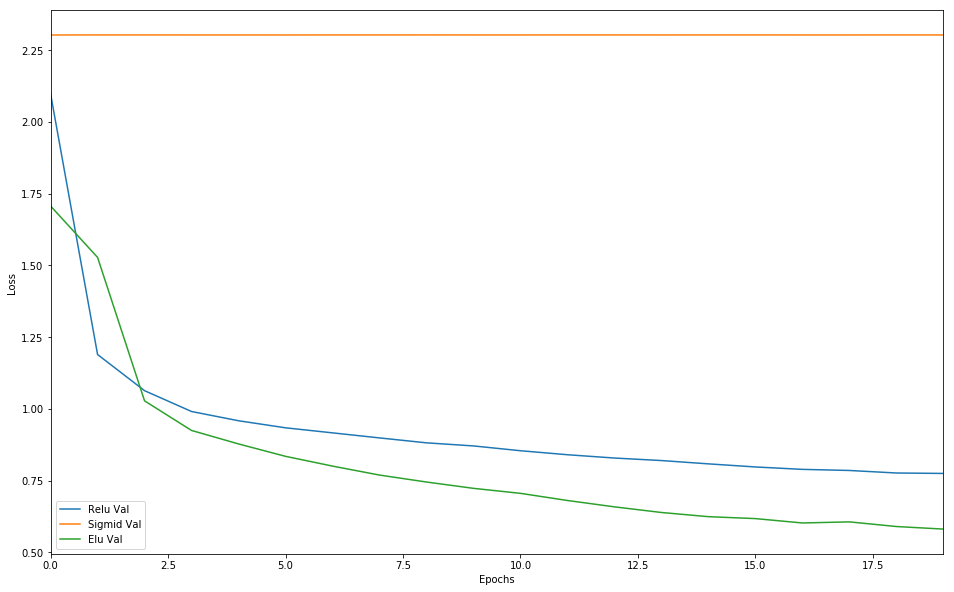

In [52]:
plot_history([('relu',   history1), 
              ('sigmoid', history5),
              ('elu',   history6),
             ],
             start=0)

# 3. Keras бывет разным, про skip-connection

На первой паре мы с вами говорили, что в Keras задавать модели можно по-разному. Второй способ делать это: функциональный стиль. Он даёт на порядок больше возможностей. Давайте посмотрим как это выглядит и попробуем собрать пару моделей. 

In [53]:
init = 'uniform'
act = 'relu'

input_tensor = L.Input(shape=(28, 28))

x = L.Flatten()(input_tensor)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
output_tensor = L.Dense(10, kernel_initializer=init, 
                        activation='softmax')(x)

model = keras.Model(input_tensor, output_tensor)

In [54]:
model.compile("adam", "sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1, batch_size=500, verbose=1)

Train on 50000 samples, validate on 10000 samples
50000/50000 [==============================] - 1s 23us/sample - loss: 1.5006 - sparse_categorical_accuracy: 0.3747 - val_loss: 1.1101 - val_sparse_categorical_accuracy: 0.5256


Помните статью про то, как люди рисовали функции потерь? [Теперь появилась галерея!](https://losslandscape.com/gallery/) На паре про градиентный спуск мы говорили, что skip-connection довольно здорово меняет ландшафт функции потерь. 

![](https://i.stack.imgur.com/UDvbg.png)

Такую модель нельзя собрать через `Sequence`-стиль, но можно через функциональный стиль. Давайте попробуем сделать это. Заодно посмотрим насколько сильно в нашей ситуации будет меняться траектория обучения. 

In [58]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  создайте сеть по инструкции выше
tf.random.set_seed(42)

init = 'he_uniform'
act = 'elu'

input_tensor = L.Input(shape=(28, 28))

x1 = L.Flatten()(input_tensor)
x = L.Dense(100, kernel_initializer=init, activation=act)(x1)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.concatenate([x1, x])

x2 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x2)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.concatenate([x2, x])

x = L.Dense(100, kernel_initializer=init, activation=act)(x)
output_tensor = L.Dense(10, kernel_initializer=init, 
                        activation='softmax')(x)

model = keras.Model(input_tensor, output_tensor)

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
               metrics=['sparse_categorical_accuracy'])

history7 = model.fit(X_train, y_train, #validation_split= 0.2,
            validation_data=(X_val, y_val),
            batch_size=500, epochs=20, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.6830 - sparse_categorical_accuracy: 0.7591 - val_loss: 0.4752 - val_sparse_categorical_accuracy: 0.8278
Epoch 2/20
50000/50000 [==============================] - 1s 18us/sample - loss: 0.4529 - sparse_categorical_accuracy: 0.8387 - val_loss: 0.4382 - val_sparse_categorical_accuracy: 0.8442
Epoch 3/20
50000/50000 [==============================] - 1s 18us/sample - loss: 0.4127 - sparse_categorical_accuracy: 0.8535 - val_loss: 0.4123 - val_sparse_categorical_accuracy: 0.8526
Epoch 4/20
50000/50000 [==============================] - 1s 18us/sample - loss: 0.3926 - sparse_categorical_accuracy: 0.8618 - val_loss: 0.3965 - val_sparse_categorical_accuracy: 0.8579
Epoch 5/20
50000/50000 [==============================] - 1s 17us/sample - loss: 0.3761 - sparse_categorical_accuracy: 0.8663 - val_loss: 0.3813 - val_sparse_categorical_accuracy: 0.8623
Epoch 6/20
5000

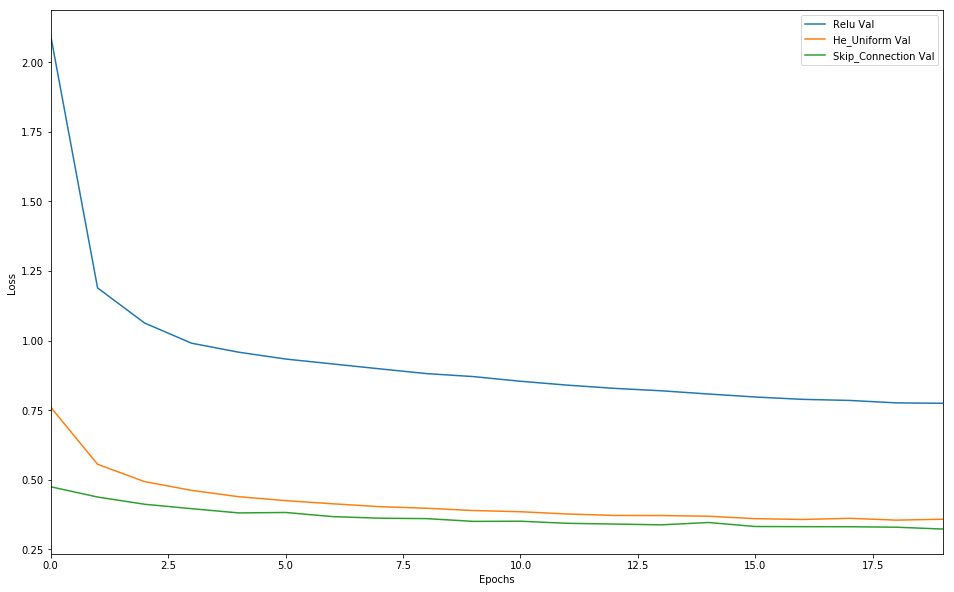

In [59]:
plot_history([('relu', history1), 
              ('he_uniform', history2),
              ('he_skip_connection', history7),
              #('skip_connection', history8),
             ],
             start=0)

# 4. Ещё немного функционального API 


## 4.1 Несколько входов

В этом примере на вход идёт две картинки.

In [ ]:
input_1 = L.Input(shape=(28, 28))
input_2 = L.Input(shape=(28, 28))

x1 = L.Flatten()(input_1)
x1 = L.Dense(100, kernel_initializer=init, activation=act)(x1)
x1 = L.Dense(100, kernel_initializer=init, activation=act)(x1)

x2 = L.Flatten()(input_2)
x2 = L.Dense(100, kernel_initializer=init, activation=act)(x2)
x2 = L.Dense(100, kernel_initializer=init, activation=act)(x2)

x = L.concatenate([x1, x2])
output = L.Dense(10, kernel_initializer=init, activation='softmax')(x)

model = keras.Model([input_1, input_2], output)
model.summary()

Немного бессмысленный пример обучения, когда на вход идут две одинаковые картиночки.

In [ ]:
model.compile("adam", "sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

model.fit([X_train, X_train], y_train, validation_data=([X_val, X_val], y_val),
          epochs=2, batch_size=500)

## 4.2 Несколько выходов и функций потерь

In [ ]:
init = 'uniform'
act = 'relu'

input_tensor = L.Input(shape=(28, 28))

x = L.Flatten()(input_tensor)
x1 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x2 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x3 = L.Dense(100, kernel_initializer=init, activation=act)(x)

output_1 = L.Dense(10, kernel_initializer=init, activation='softmax')(x1)
output_2 = L.Dense(10, kernel_initializer=init, activation='softmax')(x2)
output_3 = L.Dense(10, kernel_initializer=init, activation='softmax')(x3)

model = keras.Model(input_tensor, [output_1, output_2, output_3])

model.summary()

In [ ]:
model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy',
                                      'sparse_categorical_crossentropy', 
                                      'sparse_categorical_crossentropy'],
                                    loss_weights=[0.25, 1., 10.])

model.fit(X_train, [y_train, y_train, y_train], epochs=2, batch_size=500)

Пример с разными функциями потерь: